### Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter

In [3]:
conn = sqlite3.connect('odoo.db')
df = pd.read_sql("select * from Sales", conn)
pd.set_option('display.max_columns', None)

#### Data Cleaning


In [4]:
df2 = df[df["invoice"].str.startswith("INV")]
df2 = df[df["name"].str.contains("Sales")]
df2["date"] = pd.to_datetime(df2["date"]).dt.date
columns = ["move_id", "sales_rep_id", "write_date","partner_id", "journal_id_name", "ref", "category_id", "warehouse_id", "name", "account_type", "contact_type", "state", "balance"]
cdf = df2.drop(columns=columns)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_8704\364910940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["date"] = pd.to_datetime(df2["date"]).dt.date


Who are our top 5 customers by revenue in May?

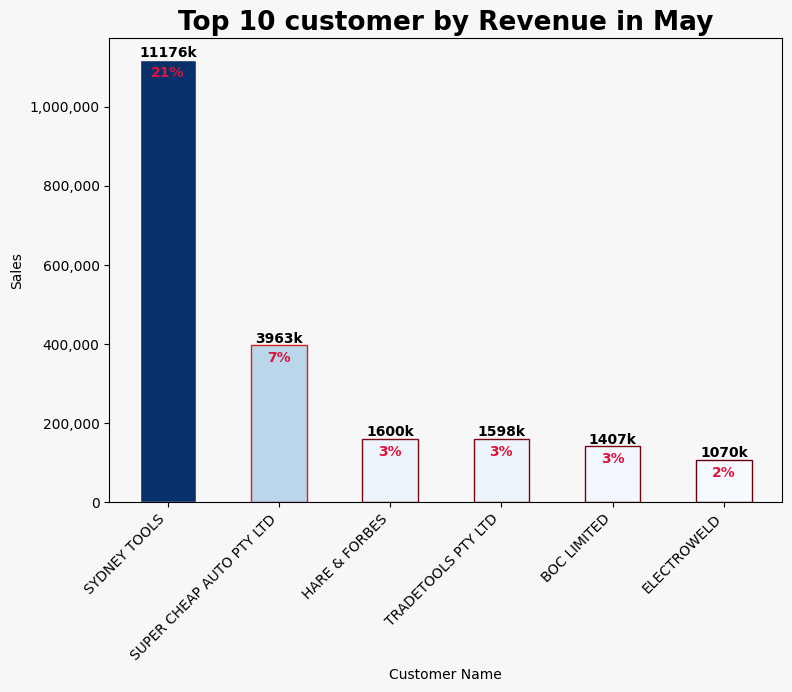

In [5]:
rev = cdf.groupby("partner_id_name")["new_balance"].sum().reset_index().sort_values(by = "new_balance", ascending = False).head(6)
rev["margin"] = rev["new_balance"]/cdf["new_balance"].sum()*100
plt.figure(figsize = (8,7),  facecolor = "#F7F7F7")
plt.gca().set_facecolor("#F7F7F7")
norm = plt.Normalize(rev["new_balance"].min(), rev["new_balance"].max())
color = cm.Blues(norm(rev["new_balance"]))
edcolor = cm.Reds_r(norm(rev["new_balance"]))
plt.bar(rev["partner_id_name"], rev["new_balance"], color = color, edgecolor = edcolor, width = 0.5)
plt.title("Top 10 customer by Revenue in May", fontsize = 19, fontweight = "bold")
plt.xlabel("Customer Name")
plt.ylabel("Sales")
plt.xticks(rotation = 45, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, value in enumerate(rev["new_balance"]):
    plt.text(i, value, f"{round(value/100)}k", color = "black", fontweight = "bold", ha = "center", va = "bottom")
    #margin setup
    margin = rev["margin"].iloc[i]
    plt.text(i, value - 50000, f"{round(margin)}%", color = "crimson", fontweight = "bold", ha="center", va= "bottom")
plt.tight_layout(pad = 1.0)
plt.show()

#### Which product are Driving the most revenue ?

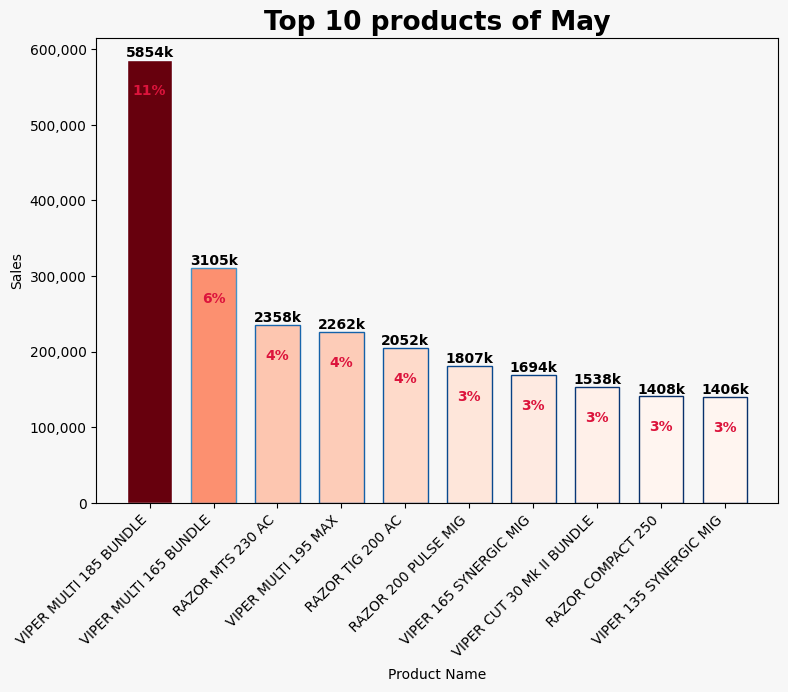

In [6]:
cdf["product_name"] = df["product_name"].str.split(r'/|\[|\]').str[2]
prev = cdf.groupby("product_name")["new_balance"].sum().reset_index().sort_values(by = "new_balance", ascending = False).head(10)
prev["margin"] = prev["new_balance"]/cdf["new_balance"].sum()*100
plt.figure(figsize = (8,7),  facecolor = "#F7F7F7")
plt.gca().set_facecolor("#F7F7F7")
norm = plt.Normalize(prev["new_balance"].min(), prev["new_balance"].max())
color = cm.Reds(norm(prev["new_balance"]))
edcolor = cm.Blues_r(norm(prev["new_balance"]))
plt.bar(prev["product_name"], prev["new_balance"], color = color, edgecolor = edcolor, width = 0.7)
plt.title("Top 10 products of May", fontsize = 19, fontweight = "bold")
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.xticks(rotation = 45, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, value in enumerate(prev["new_balance"]):
    plt.text(i, value, f"{round(value/100)}k", color = "black", fontweight = "bold", ha = "center", va = "bottom")
    #margin setup
    margin = prev["margin"].iloc[i]
    plt.text(i, value - 50000, f"{round(margin)}%", color = "crimson", fontweight = "bold", ha="center", va= "bottom")
plt.tight_layout(pad = 1.0)
plt.show()

#### Which sales rep performed the best?

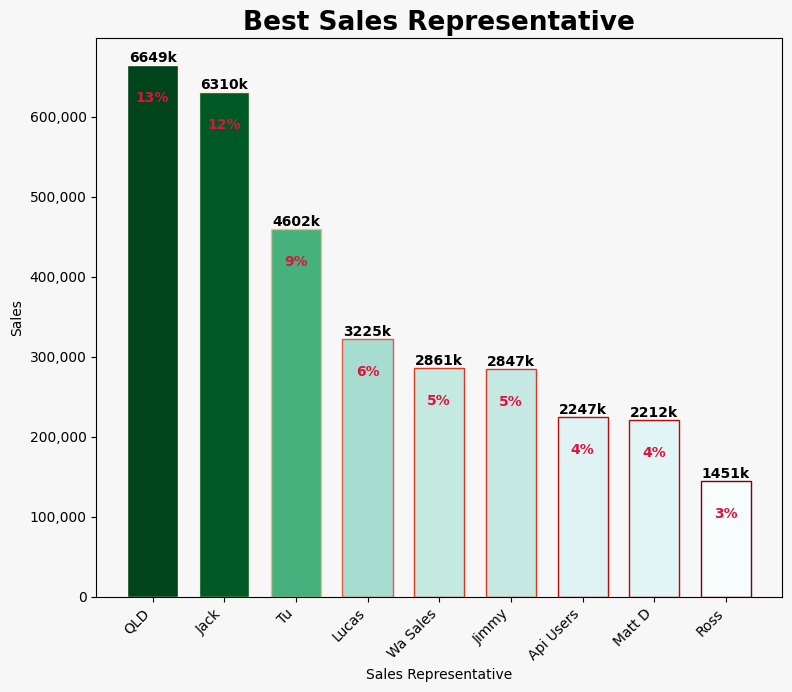

In [7]:

rep = cdf.groupby("sales_rep_name")["new_balance"].sum().reset_index().sort_values(by = "new_balance", ascending = False).head(10)
rep = rep[rep["sales_rep_name"] != "Administrator"]
rep["margin"] = rep["new_balance"]/cdf["new_balance"].sum()*100
plt.figure(figsize = (8,7),  facecolor = "#F7F7F7")
plt.gca().set_facecolor("#F7F7F7")
norm = plt.Normalize(rep["new_balance"].min(), rep["new_balance"].max())
color = cm.BuGn(norm(rep["new_balance"]))
edcolor = cm.OrRd_r(norm(rep["new_balance"]))
plt.bar(rep["sales_rep_name"], rep["new_balance"], color = color, edgecolor = edcolor, width = 0.7)
plt.title("Best Sales Representative", fontsize = 19, fontweight = "bold")
plt.xlabel("Sales Representative")
plt.ylabel("Sales")
plt.xticks(rotation = 45, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, value in enumerate(rep["new_balance"]):
    plt.text(i, value, f"{round(value/100)}k", color = "black", fontweight = "bold", ha = "center", va = "bottom")
    #margin setup
    margin = rep["margin"].iloc[i]
    plt.text(i, value - 50000, f"{round(margin)}%", color = "crimson", fontweight = "bold", ha="center", va= "bottom")
plt.tight_layout(pad = 1.0)
plt.show()

#### Are there many paid invoices?

In [8]:
# upi = df.groupby("payment_state")["new_balance"].sum().reset_index().sort_values(by = "new_balance")
# upi= upi[upi["payment_state"] != "not_paid"]
# plt.figure(figsize = (7,6),  facecolor = "#54C3CF")
# plt.gca().set_facecolor("#F7F7F7")
# explode = [0.3,0,0]
# colors = sns.color_palette("Blues_r", n_colors=4)
# plt.pie(upi["new_balance"], labels=upi["payment_state"], autopct = '%0.2f%%', shadow = True, explode = explode, colors= colors,
#         textprops = {"fontsize": 15}, wedgeprops={"linewidth": 2, "edgecolor": "black"})
# plt.title("Paid Invoices",fontsize = 19, fontweight = "bold", fontfamily = "monospace")
# plt.show()

#### Which warehouse fulfilled the most orders?

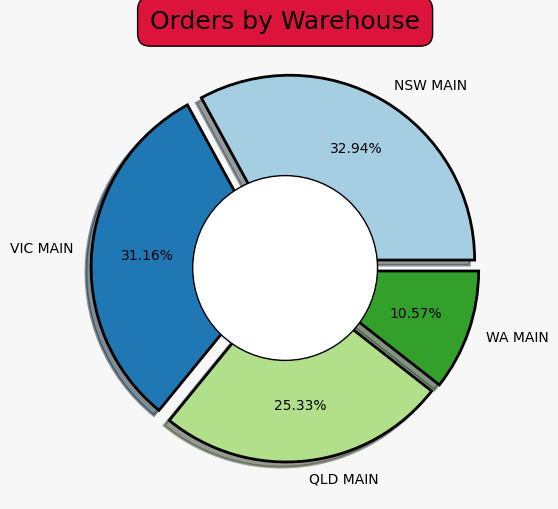

In [9]:
war = cdf.groupby("warehouse_name")["invoice"].count().reset_index().sort_values(by = "invoice", ascending = False)
war = war[war["warehouse_name"] != "NSW 2ND GEAR - ONLINE"]
plt.figure(figsize=(7,6), facecolor = "#F7F7F7")
colors = sns.color_palette("Paired", n_colors=4)
plt.pie(war["invoice"], labels = war["warehouse_name"], autopct="%0.2f%%",pctdistance= 0.7, shadow = True, wedgeprops={"linewidth": 2, "edgecolor": "black"}, explode =[0.05,0.05,0.05,0.05], colors = colors)
#piechart hole
hole = plt.Circle((0,0), 0.5, facecolor = "white", edgecolor = "black")
plt.gcf().gca().add_artist(hole)
plt.title("Orders by Warehouse", fontsize = 18, bbox = dict(facecolor = 'crimson', boxstyle = 'round, pad=0.5'))
plt.show()

#### What are the top 5 highest-value orders from each warehouse?


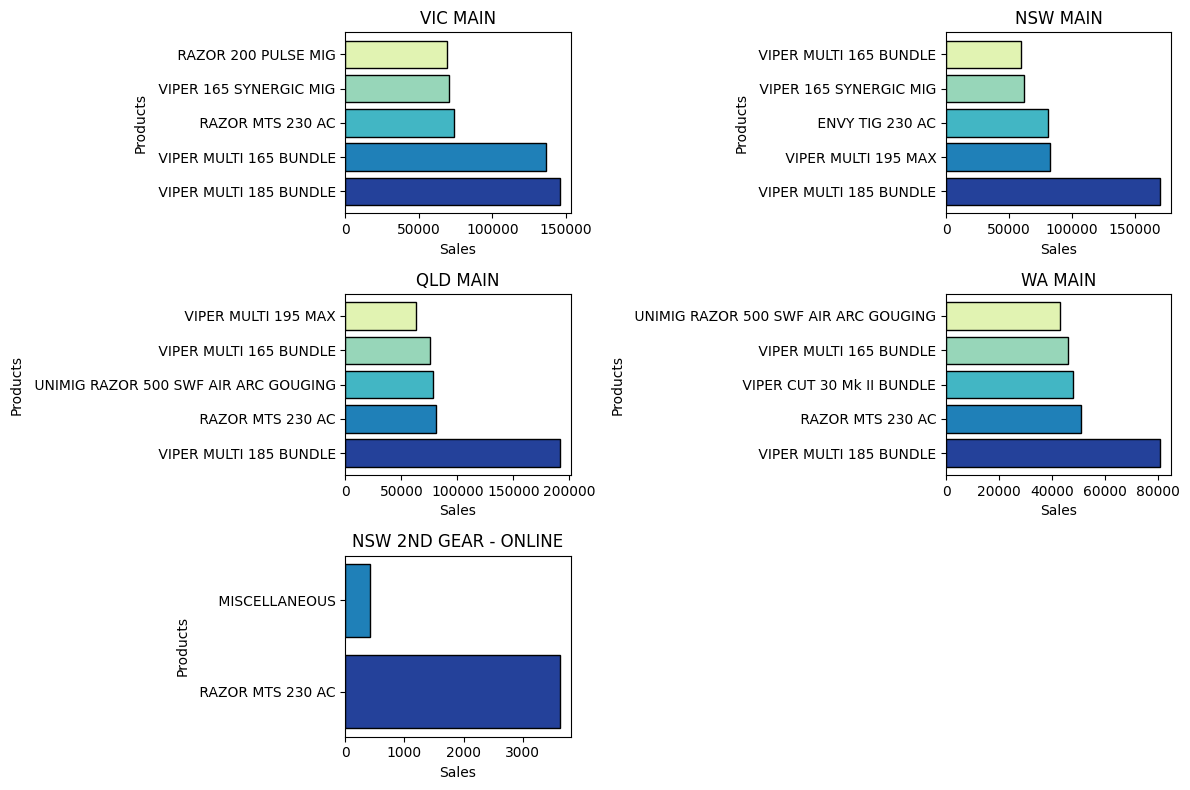

In [112]:
wn = cdf["warehouse_name"].unique()
wn = np.delete(wn, 2)
difc = ["twilight", "hsv","berlin","manivo","RdBu", "Wistia"]
barclr = sns.color_palette("YlGnBu_r", n_colors= 5)
plt.figure(figsize=(12, 8)) 
for ind, i in enumerate(wn):
        temp = cdf[cdf["warehouse_name"] == i]
        hvow = temp.groupby(["warehouse_name","product_name"])["new_balance"].sum().reset_index().sort_values(by = ["warehouse_name", "new_balance"], ascending = [True,False]).head(5)
        plt.subplot(3,2, ind+1)
        plt.barh(hvow["product_name"], hvow["new_balance"], color = barclr, edgecolor = "black" )
        plt.xlabel("Sales")
        plt.ylabel("Products")
        plt.subplots_adjust(top=2, bottom=1)
        plt.title(i)
        plt.tight_layout()
plt.show()


In [105]:
wn = np.delete(wn, 2)
wn

array(['VIC MAIN', 'NSW MAIN', 'QLD MAIN', 'WA MAIN',
       'NSW 2ND GEAR - ONLINE'], dtype=object)

#### What is the total revenue vs refunds?

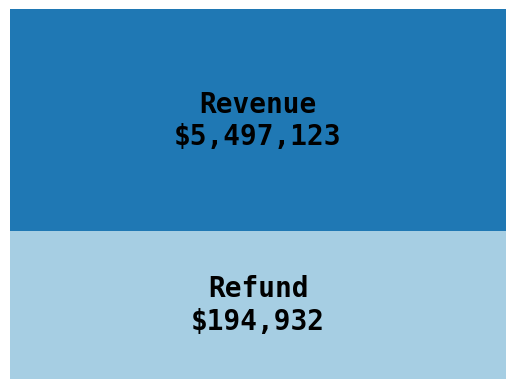

In [10]:
df["invoice_type"] = df["invoice"].str.split('/').str[0]
df["category"] = df["invoice_type"].map({
    "INV": "Revenue",
    "BILL": "Revenue",
    "RBILL": "Refund",
    "RINV": "Refund"
})
summary = df.groupby("category")["new_balance"].sum().abs().reset_index()
summary["label"] = summary.apply(lambda x: f"{x['category']}\n${x['new_balance']:,.0f}", axis=1)
a = [1,1.5]
import squarify
squarify.plot(sizes = a, label = summary["label"], color = colors, text_kwargs = {
    'fontsize': 20,
    'fontweight': "bold",
    'fontfamily':"monospace"
})
plt.axis('off')
plt.show()



#### what is the average deal size per location?

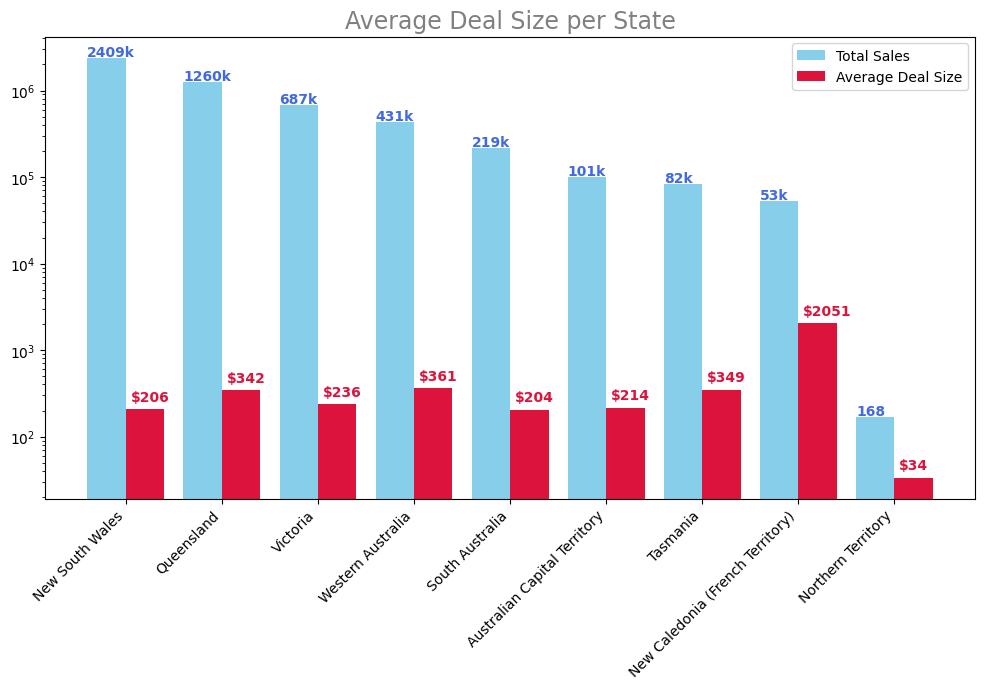

In [51]:
cdf["adlocation"] = cdf["address"].str.split(',').str[2].str.strip()
cdf["adlocation"] = cdf["adlocation"].map({
    'Victoria': 'Victoria',
    'Australian Capital Territory': 'Australian Capital Territory',
    'New South Wales': 'New South Wales',
    'Queensland': 'Queensland',
    'Western Australia': 'Western Australia',
    'South Australia': 'South Australia',
    'Tasmania': 'Tasmania',
    'Northern Territory': 'Northern Territory',
    '2830 DUBBO': 'New South Wales',
    '5253 MURRAY BRIDGE': 'South Australia',
    '2103 MONA VALE': 'New South Wales',
    '2148 NSW': 'New South Wales',
    '4509 QLD': 'Queensland',
    'New Caledonia': 'New Caledonia (French Territory)',
    'Australia': 'Australian Capital Territory',
    np.nan: np.nan
}
)
ads = cdf.groupby("adlocation")["new_balance"].mean().reset_index().sort_values(by = "new_balance", ascending = False)
sds = cdf.groupby("adlocation")["new_balance"].sum().reset_index().sort_values(by = "new_balance", ascending = False)
merge_df = pd.merge(ads, sds, on= "adlocation").sort_values(by = "new_balance_y", ascending= False)
clr = sns.color_palette("Blues_r", n_colors=8)
clr2 = sns.color_palette("Reds_r", n_colors=8)
x = np.arange(len(ads))
y = list(map(lambda xa: xa + 0.4, x))
plt.figure(figsize = (12,6))
plt.bar(x, merge_df["new_balance_y"], color = "skyblue", label = "Total Sales", width=0.4)
plt.bar(y, merge_df["new_balance_x"], color = "crimson", label = "Average Deal Size", width=0.4)
plt.xticks(x + 0.2, merge_df["adlocation"], rotation=45, ha = "right")
plt.yscale("log")
for i,value in enumerate(merge_df["new_balance_y"]):
    lc = merge_df["adlocation"].iloc[i]
    l2 = merge_df["new_balance_x"].iloc[i]
    if lc != "Northern Territory":
        plt.text(i - 0.2, value + (value)*.05, f"{round(value/1000)}k", color = "royalblue", fontweight = "bold")
    else:
        plt.text(i - 0.2, value + (value)*.05, f"{round(value)}", color = "royalblue", fontweight = "bold")
    
    plt.text(i+0.25, l2 + (l2 * 0.25), f"${round(l2)}", color = "crimson", fontweight = "bold")
plt.legend()
plt.title("Average Deal Size per State", fontsize= 17, color = "Grey")
plt.show()


#### Predicting Sales Values (Linear Regression)

In [84]:
df.sample(1)

,move_id,invoice,invoice_origin,sales_rep_id,sales_rep_name,date,write_date,partner_id,partner_id_name,state,payment_state,product_name,journal_id_name,ref,account_id_id,account_id_name,name,account_type,move_name,invoice_type,price_unit,quantity,debit,credit,balance,warehouse_id,address,contact_type,category_id,new_balance,warehouse_name,category
18809,"[279626, 'INV/2025/17647 (18461)']",INV/2025/17647,S25388,2,Administrator,2025-05-05,2025-05-05 00:43:18.339788,4376,TOTAL TOOLS (TINGALPA),posted,not_paid,[U11006K] VIPER 165 SYNERGIC MIG/TIG/STICK,Customer Invoices,18461,738,42321 Sales,Sales,income,INV/2025/17647,INV,524.3,1,0.0,524.3,-524.3,3,"10 GRAYSTONE ST, 4173 TINGALPA",customer,Total Tools,524.3,QLD MAIN,Revenue
